## Day 23 Lecture 1 Assignment

In this assignment, we will explore feature selection and dimensionality reduction techniques. We will use both the FIFA ratings dataset and the Chicago traffic crashes dataset.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
crash_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/traffic_crashes_chicago.csv')
soccer_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/fifa_ratings.csv')

In [ ]:
soccer_data.head()

,ID,Name,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,158023,L. Messi,94,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26
1,20801,Cristiano Ronaldo,94,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23
2,190871,Neymar Jr,92,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33
3,192985,K. De Bruyne,91,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51
4,183277,E. Hazard,91,81,84,61,89,80,95,83,79,83,94,94,88,95,90,94,82,56,83,66,80,54,41,87,89,86,91,34,27,22


We will begin with the Chicago traffic crashes dataset, focusing on removing columns with significant missing data.

Remove all columns with more than 5% missing data from the dataframe. (The *missingness summary* function we wrote a few exercises ago will speed this process up significantly.) Print out the columns that were removed, and the proportion of missing data for each column.

In [ ]:
# answer goes here
def missingness_summary(df, print_log=False, sort='ascending'):
  s = df.isnull().sum()*100/df.isnull().count()
    
  if sort.lower() == 'ascending':
    s = s.sort_values(ascending=True)
  elif sort.lower() == 'descending':
    s = s.sort_values(ascending=False)  
  if print_log: 
    print(s)
  
  return pd.Series(s)

s = missingness_summary(crash_data)
high_indexes = []
s[0]
for x in s.index:
  if s[x] > 0.05:
    high_indexes.append(x)
crash = crash_data.drop(high_indexes, axis=1)




Next, we will shift our focus to the FIFA ratings dataset and explore univariate feature selection techniques. We will treat "Overall" as the response and the other ratings as features.

Using the correlations between the response and features, identify the 5 features with the greatest univariate correlation to the response.

In [ ]:
# answer goes here

fifa = soccer_data.iloc[:, 2::]

fifa_corr = fifa.corr()
print(fifa_corr.head())

correlations = fifa_corr.iloc[1:, 0]
correlations

np.abs(correlations).sort_values(ascending=False).head(5)




                  Overall  Crossing  ...  StandingTackle  SlidingTackle
Overall          1.000000  0.496603  ...        0.264082       0.224365
Crossing         0.496603  1.000000  ...        0.085429       0.078963
Finishing        0.373079  0.413404  ...       -0.558565      -0.585841
HeadingAccuracy  0.466908 -0.134959  ...        0.257420       0.234933
ShortPassing     0.722720  0.632386  ...        0.235083       0.203009

[5 rows x 30 columns]


Reactions       0.847739
Composure       0.801749
ShortPassing    0.722720
BallControl     0.717933
LongPassing     0.585104
Name: Overall, dtype: float64

Use sklearn's "SelectKBest" function to select the top 5 features using two different scoring metrics: f_regression and mutual_info_regression. Print out the top 5 columns that are selected by both. How do they compare to the ones selected by  univariate correlation?

In [ ]:
# answer goes here
fifa_target = soccer_data.iloc[:, 2]
fifa_vars = soccer_data.iloc[:, 3::]

from sklearn.feature_selection import SelectKBest, f_classif, f_regression, mutual_info_regression
k = 5
kbest = SelectKBest(k=k, score_func=f_regression)
best_features = kbest.fit_transform(fifa_vars, fifa_target)
best_features = pd.DataFrame(best_features, columns=fifa_vars.columns[kbest.get_support()])
print(best_features.columns)

k = 5
kbest = SelectKBest(k=k, score_func=mutual_info_regression)
best_features = kbest.fit_transform(fifa_vars, fifa_target)
best_features = pd.DataFrame(best_features, columns=fifa_vars.columns[kbest.get_support()])
print(best_features.columns)

##The only difference between the two scoring metrics is dribbling being present in the mutual_info_regression
##The same features are present in the univariate correlation and the f_regression analysis
##Dribbling is only present in the mutual info regression analysis



Index(['ShortPassing', 'LongPassing', 'BallControl', 'Reactions', 'Composure'], dtype='object')
Index(['ShortPassing', 'Dribbling', 'BallControl', 'Reactions', 'Composure'], dtype='object')


Shifting our focus from feature selection to dimensionality reduction, perform PCA on the ratings provided, excluding "Overall". Then, answer the following questions:

- What percentage of the total variance is capture by the first component? What about the first two, or first three?
- Looking at the components themselves, how would you interpret the first two components in plain English?

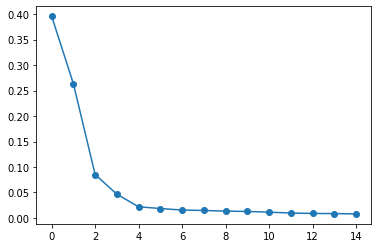

[0.39592941 0.26331948 0.08504495 0.046619   0.02187217 0.01854771
 0.01545014 0.01475734 0.01337544 0.01275228 0.01139355 0.00965644
 0.00886381 0.00855839 0.00791845]


In [ ]:
# answer goes here
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
fifa_pca = pca.fit_transform(fifa_vars)
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.show()
print(pca.explained_variance_ratio_)

#The first pca explains 39% of the variance in the data
#The second pca explains 26% of the variance in the data
